#  Load the Datasest

In [2]:
import pandas as pd

# Adjust the path as necessary
df = pd.read_csv("raw_complaints.csv", low_memory=False)

# Preview
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


#  Check for Nulls & Basic Info

In [3]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [4]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

# Missing value per column

In [5]:
print("\n🧮 Missing values per column:\n")
print(df.isna().sum().sort_values(ascending=False))



🧮 Missing values per column:

Tags                            8981029
Consumer disputed?              8841498
Consumer complaint narrative    6629041
Company public response         4770207
Consumer consent provided?      1649561
Sub-issue                        839522
Sub-product                      235295
State                             54516
ZIP code                          30228
Company response to consumer         20
Issue                                 6
Date sent to company                  0
Timely response?                      0
Date received                         0
Submitted via                         0
Product                               0
Company                               0
Complaint ID                          0
dtype: int64


# Droping Columns Above 95% Missing value

In [6]:

#  Drop Columns with Too Many Nulls

null_ratio = df.isna().sum() / len(df)
columns_to_drop = null_ratio[null_ratio > 0.95].index.tolist()
print(f"\n📉 Dropping columns with >95% missing values: {columns_to_drop}")
df.drop(columns=columns_to_drop, axis=1, inplace=True)




📉 Dropping columns with >95% missing values: []


# Filtering to 5 Required Products

In [7]:
# Filter to Required Products
products_needed = [
    "Credit card", "Personal loan", "Buy Now, Pay Later (BNPL)",
    "Savings account", "Money transfers"
]
print("\n📊 Product value counts:\n")
print(df["Product"].value_counts())

df = df[df["Product"].isin(products_needed)]
print(f"\nFiltered dataset shape (5 products): {df.shape}")


📊 Product value counts:

Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           8620

# Droping Rows without Narratives

In [8]:
#  Drop Rows Without Narratives

print(f"\n🧼 Rows with complaint narrative before filtering: {df.shape[0]}")
df = df.dropna(subset=["Consumer complaint narrative"])
print(f"After removing rows without complaint narrative: {df.shape[0]}")


🧼 Rows with complaint narrative before filtering: 232040
After removing rows without complaint narrative: 82164


In [10]:
#  Clean Narratives
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["cleaned_narrative"] = df["Consumer complaint narrative"].apply(clean_text)


# Complaint Narrative Length (EDA)

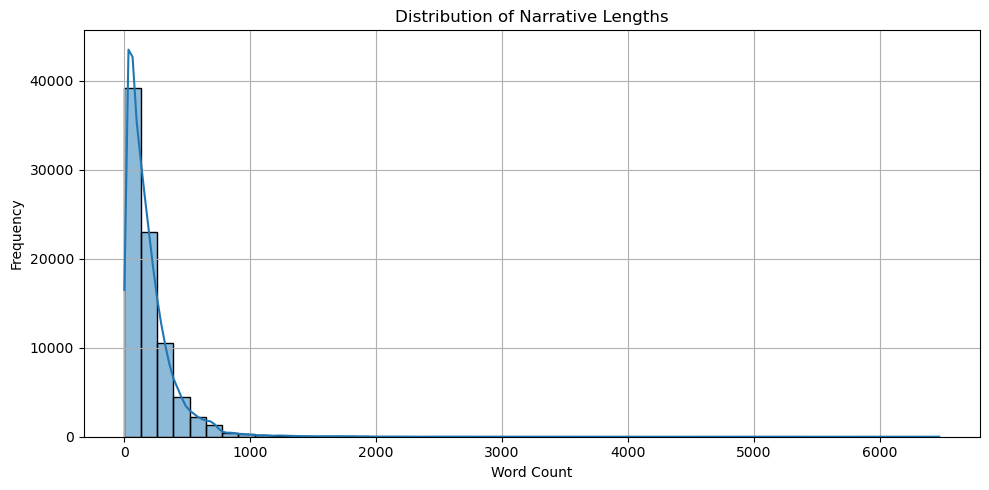

In [13]:
# Narrative Length Distribution
import matplotlib.pyplot as plt
import seaborn as sns

df["narrative_length"] = df["cleaned_narrative"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df["narrative_length"], bins=50, kde=True)
plt.title("Distribution of Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

#   Distribution of Complaints by Product

C:\Users\dell\AppData\Local\Temp\ipykernel_2308\138976971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index, palette='viridis')
C:\Users\dell\AppData\Local\Temp\ipykernel_2308\138976971.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


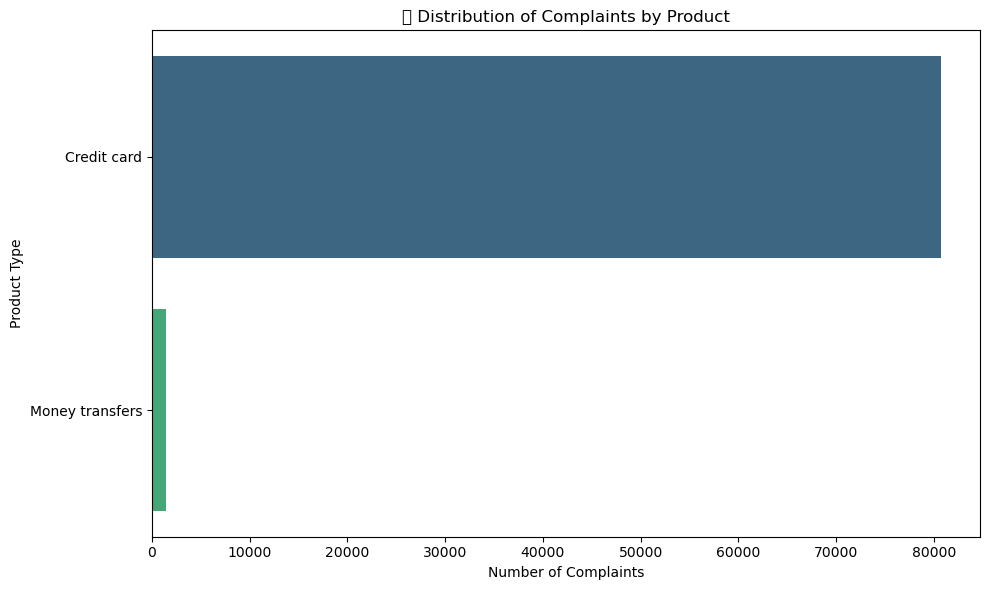

In [17]:
#  Distribution of Complaints by Product
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index, palette='viridis')
plt.title('📊 Distribution of Complaints by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product Type')
plt.tight_layout()

# Save the plot
plt.show()


# Check Proportion of Narratives With vs. Without Text

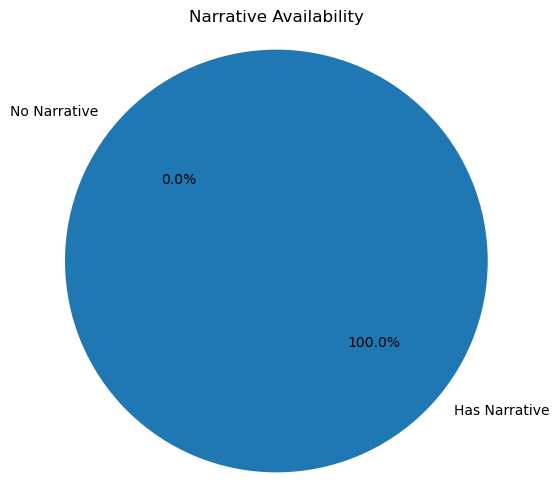

In [15]:
has_narrative = df['Consumer complaint narrative'].notnull().sum()
no_narrative = df['Consumer complaint narrative'].isnull().sum()

labels = ['Has Narrative', 'No Narrative']
sizes = [has_narrative, no_narrative]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Narrative Availability')
plt.axis('equal')
plt.show()


*  I get 0 %  No Narrative Because of I Drop on the above.

# Save Cleaned Dataset

In [21]:
import os

# Create directory if it doesn't exist
processed_data_path = "data/Processed_data"
os.makedirs(processed_data_path, exist_ok=True)

# Now save the file
filtered_path = os.path.join(processed_data_path, "filtered_complaints.csv")
df.to_csv(filtered_path, index=False)
print(f"\n✅ Cleaned data saved to: {filtered_path}")



✅ Cleaned data saved to: data/Processed_data\filtered_complaints.csv
